In [1]:
import numpy as np
import sqlite3 as db
import pandas as pd
from lsst.sims.utils import angularSeparation
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Define a point to look around
ra = 20
dec = -40

radius = 1.75
filter_colors = {'u': 'purple', 'g': 'blue', 'r': 'green', 'i': 'cyan', 'z': 'orange', 'y': 'red'}

In [3]:
filenames = ['baseline_1exp_pairsmix_10yrs.db', 'roll_mod2_sdf0.20mixed_10yrs.db',
             'roll_mod3_sdf0.10mixed_10yrs.db', 'very_alt3_rm5illum15_10yrs.db', 'presto_third_10yrs.db']
#filenames = ['baseline_1exp_pairsmix_10yrs.db']

baseline_1exp_pairsmix_10yrs.db 956
roll_mod2_sdf0.20mixed_10yrs.db 920
roll_mod3_sdf0.10mixed_10yrs.db 897
very_alt3_rm5illum15_10yrs.db 880
presto_third_10yrs.db 940


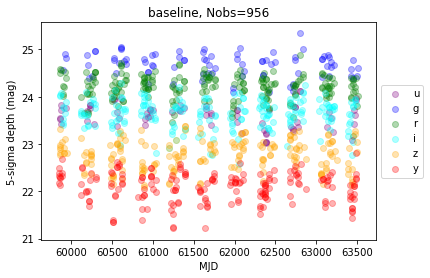

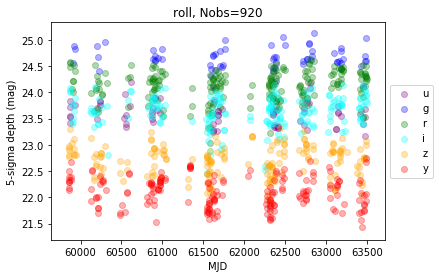

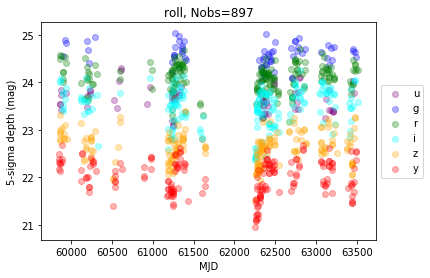

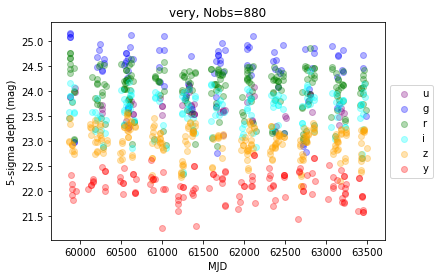

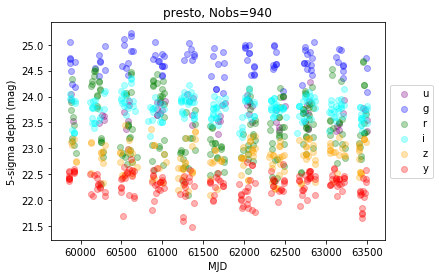

In [4]:
for i,filename in enumerate(filenames):
    conn = db.connect(filename)
    df = pd.read_sql('select * from summaryallprops;', conn)
    
    ang_dist = angularSeparation(df['fieldRA'].values, df['fieldDec'].values, ra, dec)
    overlapping = np.where(ang_dist < radius)[0]
    df_sub = df.iloc[overlapping, :]
    fig, ax = plt.subplots()
    for filtername in filter_colors:
        infilt = np.where(df_sub['filter'].values == filtername)
        ax.scatter(df_sub['observationStartMJD'].values[infilt],
                   df_sub['fiveSigmaDepth'].values[infilt],
                   c=filter_colors[filtername], label=filtername, alpha=0.3)
    title = filename.split('_')[0] + ', Nobs=%i' % df_sub.shape[0]
    ax.set(xlabel='MJD', ylabel='5-sigma depth (mag)', title=title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    print(filename, df_sub.shape[0])
    fig.savefig('%i.pdf' % i)
    conn.close()
    # let's write the subset out to a database
    conn = db.connect('sub_'+filename)
    df_sub.to_sql('SummaryAllProps', conn, index=False)
    conn.close()

In [5]:
# What do we see in this plot. Looks like 11 seasons (the survey probably starts part way through the 
# first season, and last one is cut off)

In [6]:
df_sub

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,rotTelPos,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase
1523,1523,20.176570,-41.427918,59856.134080,59856.164995,30.0,y,283.462356,1,1.116374,...,2.026708,262.287238,211.971897,3.311204,-0.073040,297.668060,-25.686152,67.982190,133.399432,57.890697
3439,3439,20.668833,-40.194079,59858.161374,59858.193807,30.0,y,295.505380,1,1.051269,...,2.381869,284.079554,196.321032,3.343384,-0.086662,327.979101,-17.945273,50.258640,134.070529,72.939521
3485,3485,20.668833,-40.194079,59858.180843,59858.209158,30.0,y,306.131683,1,1.028798,...,7.406517,279.266599,184.740832,3.343694,-0.086793,328.166018,-17.826174,50.191292,134.066130,73.046096
7108,7108,19.766108,-41.089122,59862.243693,59862.274915,30.0,y,51.371320,1,1.045592,...,4.065521,335.967132,148.930036,3.408533,-0.113848,20.143774,7.048535,48.138907,132.211300,97.308985
7138,7138,19.766108,-41.089122,59862.256581,59862.289801,30.0,y,61.949719,1,1.064237,...,1.846604,329.734136,143.008245,3.408739,-0.113933,20.236506,7.124930,48.215989,132.207364,97.260338
7150,7150,21.145769,-38.494486,59862.261655,59862.289801,30.0,y,66.788457,1,1.059761,...,4.377293,327.423677,140.830995,3.408821,-0.113967,20.273460,7.154799,45.656496,134.650331,97.240838
7172,7172,21.145769,-38.494486,59862.271003,59862.304824,30.0,y,74.241122,1,1.077500,...,1.054918,323.349577,137.022708,3.408970,-0.114029,20.342206,7.209526,45.710124,134.647765,97.204393
8938,8938,18.751245,-40.394616,59864.256024,59864.291046,30.0,y,68.834668,1,1.076064,...,0.653714,4.020493,143.655042,3.440846,-0.127101,45.054049,18.167988,63.471345,132.300035,83.743410
15990,15990,19.454269,-41.482101,59874.218183,59874.248960,30.0,i,56.220884,1,1.057967,...,3.747659,106.889661,163.084958,3.603230,-0.190729,172.046908,8.712607,139.265050,127.195032,21.922761
16025,16025,19.454269,-41.482101,59874.234934,59874.248960,30.0,g,56.220884,1,1.087539,...,12.810716,103.017525,154.905469,3.603507,-0.190832,172.294273,8.628392,139.322219,127.187349,21.790547


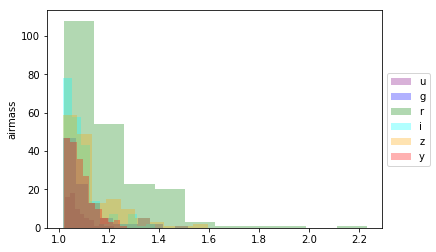

In [7]:
fig, ax = plt.subplots()
for filtername in filter_colors:
    infilt = np.where(df_sub['filter'].values == filtername)
    ack = ax.hist(df_sub['airmass'].values[infilt], color=filter_colors[filtername], alpha=.3, label=filtername) 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('airmass')

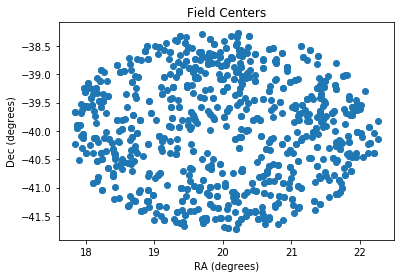

In [8]:
plt.scatter(df_sub['fieldRA'], df_sub['fieldDec'])
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title('Field Centers')